### `Data Description:`
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
 
### `Domain:`
Banking
 
### `Context:`
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.
Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer ($000)
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month ($000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. ($000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

### `Learning Outcomes:`
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation


 
### `Objective:`
The classification goal is to predict the likelihood of a liability customer buying personal loans.
 
### `Steps and tasks:`
1.	Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2.	EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready
3.	Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4.	Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
5.	Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
6.	Give conclusion related to the Business understanding of your model? (5 marks)

### 1.	Import the datasets and libraries check datatype, statistical summary, shape, null values or incorrect imputation
#### (5 marks)

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd
## import plotly.graph_objects as go
import re
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 

pd.set_option('display.max_columns', None)

In [2]:
raw_data_location = os.path.join(os.getcwd(), 'data', 'Bank_Personal_Loan_Modelling.csv')
previous_campaign_results = pd.read_csv(raw_data_location)
previous_campaign_results.columns = [re.sub(r'(?<!^)(?=[A-Z][a-z])', '_', col.replace(' ', '')).lower() for col in previous_campaign_results.columns]
previous_campaign_results.head()

,id,age,experience,income,zip_code,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
col_rename = {
    'experience': 'work_experience_years'
    , 'income': 'annual_income_thousands'
    , 'family': 'family_size'
    , 'cc_avg': 'monthly_credit_card_avg'
    , 'education': 'education_level'
    , 'mortgage': 'mortgage_amount_thousands'
    , 'personal_loan': 'personal_loan_target'
    , 'securities_account': 'has_securities_account' 
    , 'cd_account': 'has_cd'  
    , 'online': 'is_online_banking'
    , 'credit_card': 'has_credit_card' 
}

previous_campaign_results.rename(columns=col_rename, inplace=True)
cols = list(previous_campaign_results.columns.values)
cols.remove('personal_loan_target')
cols = ['personal_loan_target'] + cols
previous_campaign_results = previous_campaign_results[cols]
previous_campaign_results.head()

,personal_loan_target,id,age,work_experience_years,annual_income_thousands,zip_code,family_size,monthly_credit_card_avg,education_level,mortgage_amount_thousands,has_securities_account,has_cd,is_online_banking,has_credit_card
0,0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,0,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,0,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,0,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,0,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [4]:
previous_campaign_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   personal_loan_target       5000 non-null   int64  
 1   id                         5000 non-null   int64  
 2   age                        5000 non-null   int64  
 3   work_experience_years      5000 non-null   int64  
 4   annual_income_thousands    5000 non-null   int64  
 5   zip_code                   5000 non-null   int64  
 6   family_size                5000 non-null   int64  
 7   monthly_credit_card_avg    5000 non-null   float64
 8   education_level            5000 non-null   int64  
 9   mortgage_amount_thousands  5000 non-null   int64  
 10  has_securities_account     5000 non-null   int64  
 11  has_cd                     5000 non-null   int64  
 12  is_online_banking          5000 non-null   int64  
 13  has_credit_card            5000 non-null   int64

In [5]:
previous_campaign_results.shape

(5000, 14)

In [6]:
previous_campaign_results.describe()

,personal_loan_target,id,age,work_experience_years,annual_income_thousands,zip_code,family_size,monthly_credit_card_avg,education_level,mortgage_amount_thousands,has_securities_account,has_cd,is_online_banking,has_credit_card
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.096000,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,0.294621,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,0.000000,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.000000,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
previous_campaign_results.isnull().sum()

personal_loan_target         0
id                           0
age                          0
work_experience_years        0
annual_income_thousands      0
zip_code                     0
family_size                  0
monthly_credit_card_avg      0
education_level              0
mortgage_amount_thousands    0
has_securities_account       0
has_cd                       0
is_online_banking            0
has_credit_card              0
dtype: int64

**Observations:**

1. Exactly 5000 rows of data would be odd if this wasn't a dataset curated for a project like this

2. There should not be negative years of work experience

3. $8,000 sounds very low for annual income if the lowest level of education is a college degree.  Are they retired or working part time or is this bad data?

4. I'm not 100% sure what "Advanced/Professional" means.  I would ask someone who knows the data better in a work situation. Even though it may be ordinal, going to treat it as a categorical variable instead of numerical. 

5. Zipcodes should have 5 digits.

### 2.	EDA: Study the data distribution in each attribute and target variable, share your findings
#### (20 marks)

#### Number of unique in each column?

In [8]:
for col in previous_campaign_results.columns.values:
    print(f'{col}: {len(set(previous_campaign_results[col])):,} unique values\n')

personal_loan_target: 2 unique values

id: 5,000 unique values

age: 45 unique values

work_experience_years: 47 unique values

annual_income_thousands: 162 unique values

zip_code: 467 unique values

family_size: 4 unique values

monthly_credit_card_avg: 108 unique values

education_level: 3 unique values

mortgage_amount_thousands: 347 unique values

has_securities_account: 2 unique values

has_cd: 2 unique values

is_online_banking: 2 unique values

has_credit_card: 2 unique values



#### Number of people with zero mortgage?

In [9]:
num_no_mortgage = len(previous_campaign_results[previous_campaign_results['mortgage_amount_thousands'] == 0])
print(f'number of people with zero mortgage: {num_no_mortgage:,}')
print(f'pct of people with zero mortgage: {num_no_mortgage/len(previous_campaign_results)*100}%')

number of people with zero mortgage: 3,462
pct of people with zero mortgage: 69.24%


#### Number of people with zero credit card spending per month?

In [10]:
num_no_credit_card_usage = len(previous_campaign_results[previous_campaign_results['monthly_credit_card_avg'] == 0])
print(f'number of people with zero mortgage: {num_no_credit_card_usage:,}')
print(f'pct of people with zero mortgage: {num_no_credit_card_usage/len(previous_campaign_results)*100}%')

number of people with zero mortgage: 106
pct of people with zero mortgage: 2.12%


#### Value counts of all categorical columns.

In [11]:
categorical_columns = [
    'zip_code'
    , 'education_level'
    , 'has_securities_account'
    , 'has_cd'
    , 'is_online_banking'
    , 'has_credit_card'
]
for col in categorical_columns:
    print(previous_campaign_results[col].value_counts(normalize=True).head(10))
    print('')

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
92037    0.0108
93943    0.0108
91320    0.0106
91711    0.0104
94025    0.0104
Name: zip_code, dtype: float64

1    0.4192
3    0.3002
2    0.2806
Name: education_level, dtype: float64

0    0.8956
1    0.1044
Name: has_securities_account, dtype: float64

0    0.9396
1    0.0604
Name: has_cd, dtype: float64

1    0.5968
0    0.4032
Name: is_online_banking, dtype: float64

0    0.706
1    0.294
Name: has_credit_card, dtype: float64



/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


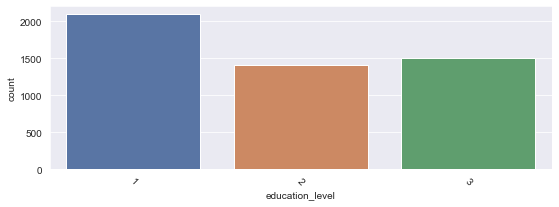

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


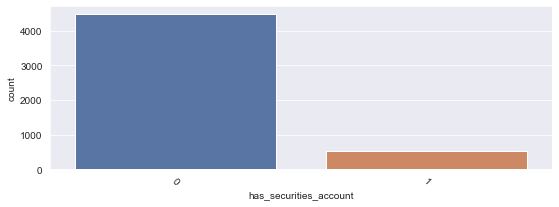

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


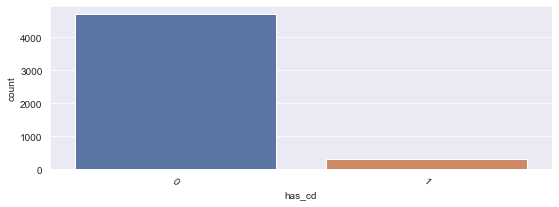

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


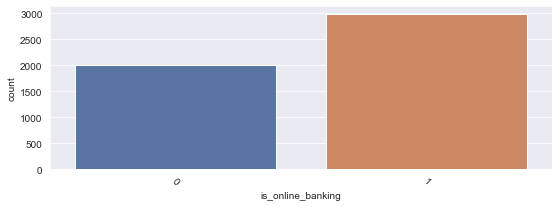

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


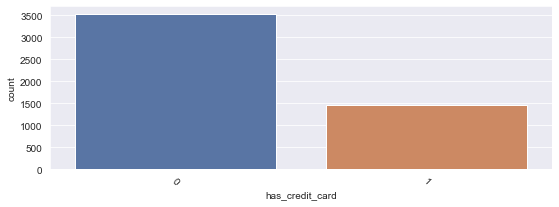

In [12]:
categorical_columns.remove('zip_code')
for col in categorical_columns:
    sns.set({'figure.figsize':(9,3)})
    counts = sns.countplot(previous_campaign_results[col])
    plt.xticks(rotation=-45)
    plt.show()
categorical_columns.append('zip_code')

In [13]:
previous_campaign_results['personal_loan_target'].value_counts(normalize=True)

0    0.904
1    0.096
Name: personal_loan_target, dtype: float64

#### Numerical Col Distribution

In [14]:
previous_campaign_results.head()

,personal_loan_target,id,age,work_experience_years,annual_income_thousands,zip_code,family_size,monthly_credit_card_avg,education_level,mortgage_amount_thousands,has_securities_account,has_cd,is_online_banking,has_credit_card
0,0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,0,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,0,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,0,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,0,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


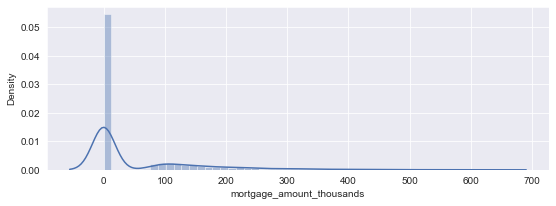

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


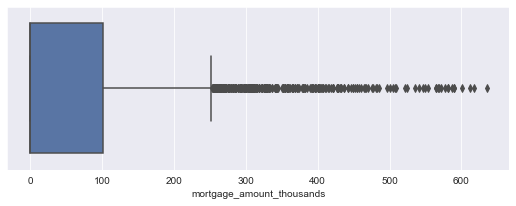

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


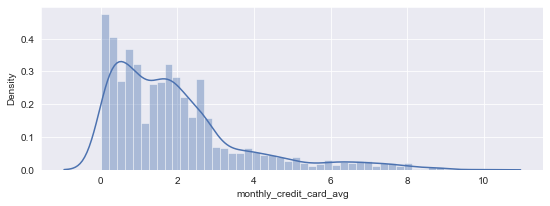

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


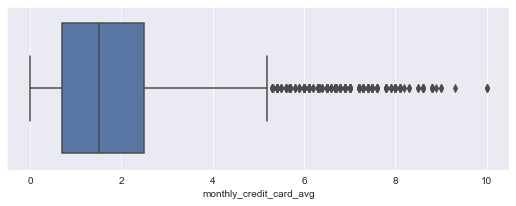

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


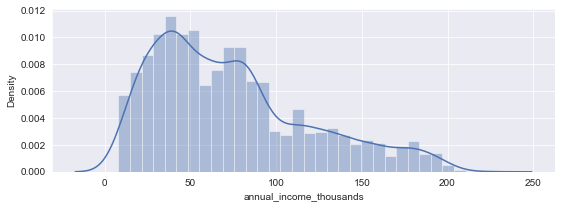

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


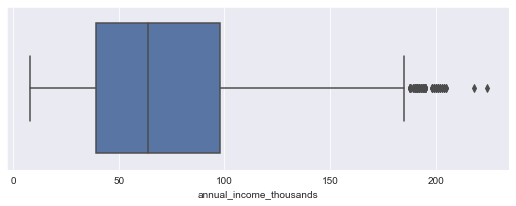

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


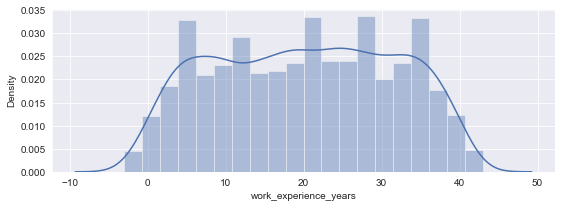

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


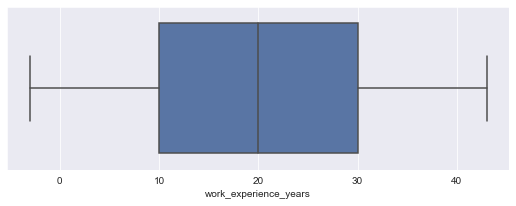

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


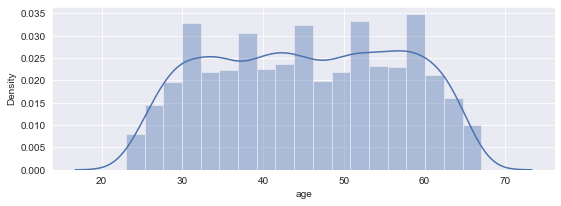

/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/markg/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


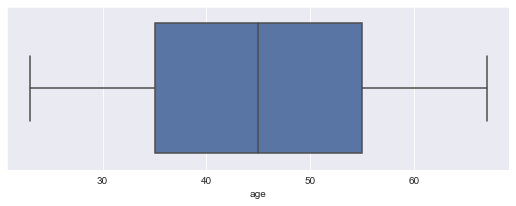

In [15]:
numerical_columns = ['mortgage_amount_thousands', 'monthly_credit_card_avg', 'annual_income_thousands', 'work_experience_years', 'age']
for col in numerical_columns:
    col_data = previous_campaign_results[col]
    sns.set({'figure.figsize':(9,3)})
    sns.distplot(col_data)
    plt.show()
    sns.set({'figure.figsize':(9,3)})
    sns.boxplot(col_data, orient='v')
    plt.show()

#### Insights
- Even thought it was stated in the project preview it is still important to not the substantial class imbalance of the target variable
- Seems to be two groups of people within the mortgage variable: this with mortgages and those without.   The group of people with mortgages have a right skewed distribution of mortgage values
- A good number of outliers in the credit card usage variable
- Despite initial concerns, annual income is normal distributed with right skew. Going to assume its fine

#### Get data model ready

In [16]:
previous_campaign_results.head()

,personal_loan_target,id,age,work_experience_years,annual_income_thousands,zip_code,family_size,monthly_credit_card_avg,education_level,mortgage_amount_thousands,has_securities_account,has_cd,is_online_banking,has_credit_card
0,0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,0,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,0,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,0,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,0,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [17]:
len(previous_campaign_results[previous_campaign_results['work_experience_years'] < 0]) / len(previous_campaign_results)

0.0104

In [18]:
## only 1 percent of data going to check target variable and age distribution

previous_campaign_results['neg_work_experience'] = [1 if i < 0 else 0 for i in previous_campaign_results['work_experience_years']]
previous_campaign_results.groupby('neg_work_experience').agg({
    'personal_loan_target': 'mean'
    , 'age': ['median', 'mean']
})

personal_loan_target    age           
                                    mean median       mean
neg_work_experience                                       
0                               0.097009     46  45.557195
1                               0.000000     24  24.519231

In [19]:
previous_campaign_results[previous_campaign_results['neg_work_experience'] == 1].groupby('age').agg({'age': 'count', 'personal_loan_target': 'mean'})

,age,personal_loan_target
age,,
23,12,0
24,17,0
25,18,0
26,1,0
28,1,0
29,3,0


In [20]:
previous_campaign_results[previous_campaign_results['age'] <= 29].groupby('age').agg({'personal_loan_target': 'mean'})

,personal_loan_target
age,
23,0.000000
24,0.000000
25,0.000000
26,0.166667
27,0.131868
28,0.087379
29,0.121951


In [21]:
## missing work experience seems to be inline with poa_target. going to replace missing work experience with median for age group
work_experince_fill_values = previous_campaign_results[(previous_campaign_results['age'] <= 29) & (previous_campaign_results['neg_work_experience'] == 0)].groupby('age').agg({'work_experience_years': 'median'}).rename(columns={'work_experience_years': 'work_experience_replace'}).reset_index()
work_experince_fill_values

,age,work_experience_replace
0,24,0
1,25,1
2,26,1
3,27,2
4,28,3
5,29,4


In [22]:
previous_campaign_results = previous_campaign_results.merge(work_experince_fill_values, on='age', how='left')
for i in previous_campaign_results.index:
    if previous_campaign_results.loc[i, 'neg_work_experience'] == 1:
        previous_campaign_results.loc[i, 'work_experience_years'] = previous_campaign_results.loc[i, 'work_experience_replace']

In [23]:
previous_campaign_results.describe()

,personal_loan_target,id,age,work_experience_years,annual_income_thousands,zip_code,family_size,monthly_credit_card_avg,education_level,mortgage_amount_thousands,has_securities_account,has_cd,is_online_banking,has_credit_card,neg_work_experience,work_experience_replace
count,5000.000000,5000.000000,5000.000000,4988.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,476.000000
mean,0.096000,2500.500000,45.338400,20.17482,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.010400,2.340336
std,0.294621,1443.520003,11.463166,11.40015,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.101459,1.283798
min,0.000000,1.000000,23.000000,0.00000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1250.750000,35.000000,10.00000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2500.500000,45.000000,20.00000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,2.000000
75%,0.000000,3750.250000,55.000000,30.00000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000,4.000000
max,1.000000,5000.000000,67.000000,43.00000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000,4.000000


In [24]:
previous_campaign_results[previous_campaign_results['zip_code'] < 10000]

,personal_loan_target,id,age,work_experience_years,annual_income_thousands,zip_code,family_size,monthly_credit_card_avg,education_level,mortgage_amount_thousands,has_securities_account,has_cd,is_online_banking,has_credit_card,neg_work_experience,work_experience_replace
384,0,385,51,25.0,21,9307,4,0.6,3,0,0,0,1,1,0,NaN


Only 1 with "bad zipcode" going to assume its fine because no obvious irregularities and it is a categorical variable with other categories only having 1 record

In [25]:
## possible alternative features to use.  need to remember logistic regression assumes indepence of variables
## Mortgage amount is not independent of income because the size of a mortgage approved for is based on income
## Work experience also is not independent of age.  Cannot work 28 yeras if you've only been alive for 25

previous_campaign_results['has_mortgage'] = [1 if 1 > 0 else 0 for i in previous_campaign_results['mortgage_amount_thousands']]

previous_campaign_results['mortgage_to_salary_ratio'] = previous_campaign_results['mortgage_amount_thousands'] / previous_campaign_results['annual_income_thousands']

previous_campaign_results['cc_usage_to_salary_ratio'] = previous_campaign_results['monthly_credit_card_avg'] / (previous_campaign_results['annual_income_thousands']/12)

previous_campaign_results['income_per_family_member'] = previous_campaign_results['family_size'] / (previous_campaign_results['annual_income_thousands']/12)

pct_90 = previous_campaign_results['monthly_credit_card_avg'].quantile(.9)
previous_campaign_results['monthly_credit_card_avg_capped'] = [max(pct_90, val) for val in previous_campaign_results['monthly_credit_card_avg']]

In [26]:
for col in previous_campaign_results.columns.values:
    print(col)

personal_loan_target
id
age
work_experience_years
annual_income_thousands
zip_code
family_size
monthly_credit_card_avg
education_level
mortgage_amount_thousands
has_securities_account
has_cd
is_online_banking
has_credit_card
neg_work_experience
work_experience_replace
has_mortgage
mortgage_to_salary_ratio
cc_usage_to_salary_ratio
income_per_family_member
monthly_credit_card_avg_capped


In [27]:
'''
, 'personal_loan_target'
, 'id'
, 'age'
, 'work_experience_years'
, 'annual_income_thousands'
, 'zip_code'
, 'family_size'
, 'monthly_credit_card_avg'
, 'education_level'
, 'mortgage_amount_thousands'
, 'has_securities_account'
, 'has_cd'
, 'is_online_banking'
, 'has_credit_card'
, 'has_mortgage'
, 'mortgage_to_salary_ratio'
, 'cc_usage_to_salary_ratio'
, 'neg_work_experience'
, 'work_experience_fill'
, 'work_experience_replace'
'''

feature_sets = {
    0: [ ## original features without zip code
        'age'
        , 'work_experience_years'
        , 'annual_income_thousands'
       ## , 'zip_code' ## could hot encode this but wont for now. woudld be a lot of features. could probably mean encode this or bring in another data source like population, median house value but will assess after results of this model if necessary
        , 'family_size'
        , 'monthly_credit_card_avg'
        , 'education_level'
        , 'mortgage_amount_thousands'
        , 'has_securities_account'
        , 'has_cd'
        , 'is_online_banking'
        , 'has_credit_card'
    ]
    , 1: [ ## same as 0 with credit card capped
        'age'
        , 'work_experience_years'
        , 'annual_income_thousands'
       ## , 'zip_code'
        , 'family_size'
        , 'monthly_credit_card_avg_capped'
        , 'education_level'
        , 'mortgage_amount_thousands'
        , 'has_securities_account'
        , 'has_cd'
        , 'is_online_banking'
        , 'has_credit_card'
    ]
    , 3: [ ## calculated features 
        'age'
        , 'work_experience_years'
        ## , 'zip_code'
        , 'education_level'
        , 'has_securities_account'
        , 'has_cd'
        , 'is_online_banking'
        , 'has_credit_card'
        , 'has_mortgage'
        , 'mortgage_to_salary_ratio'
        , 'cc_usage_to_salary_ratio'
        , 'income_per_family_member'
    ]
    , 
    4: [ ## same as 0 but with mortgage flag instead of absolute
        'age'
        , 'work_experience_years'
        , 'annual_income_thousands'
       ## , 'zip_code' ## could hot encode this but wont for now. woudld be a lot of features. could probably mean encode this or bring in another data source like population, median house value but will assess after results of this model if necessary
        , 'family_size'
        , 'monthly_credit_card_avg'
        , 'education_level'
        # , 'mortgage_amount_thousands'
        , 'has_securities_account'
        , 'has_cd'
        , 'is_online_banking'
        , 'has_credit_card'
        , 'has_mortgage'
    ]
    , 5: [ ## same as 1 but with mortgage flag instead of absolute
        'age'
        , 'work_experience_years'
        , 'annual_income_thousands'
       ## , 'zip_code'
        , 'family_size'
        , 'monthly_credit_card_avg_capped'
        , 'education_level'
        # , 'mortgage_amount_thousands'
        , 'has_securities_account'
        , 'has_cd'
        , 'is_online_banking'
        , 'has_credit_card'
        , 'has_mortgage'
    ]
}

previous_campaign_results['education_level'] = previous_campaign_results['education_level'].astype(str)
y = np.array(previous_campaign_results['personal_loan_target'])
Xs = {}
for i in feature_sets.keys():
    feature_dict = {}
    feature_set = feature_sets[i]
    df = pd.get_dummies(previous_campaign_results[feature_set], drop_first=True)
    feature_sets.update({i: df.columns.values})

    X = df.values.astype('int')
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    feature_dict.update({'standard_scaler': X})
    
    X = df.values.astype('int')
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    feature_dict.update({'min_max_scaler': X})
    
    X = df.values.astype('int')
    scaler = MaxAbsScaler()
    X = scaler.fit_transform(X)
    feature_dict.update({'max_abs_scaler': X})

    Xs.update({i: feature_dict})

In [28]:
X = Xs[0]['standard_scaler']
print(X)
X

[[-1.77441684  0.04904869 -0.53822878 ... -0.64531434 -0.62453764
  -0.65496543]
 [-0.02952359  0.04904869 -0.8641094  ... -0.64531434 -0.62453764
  -0.65496543]
 [-0.55299157  0.04904869 -1.36379301 ... -0.64531434 -0.62453764
  -0.65496543]
 ...
 [ 1.54088033  0.04904869 -1.08136314 ... -0.64531434 -0.62453764
   1.52679815]
 [ 1.71536965  0.04904869 -0.53822878 ... -0.64531434  1.60118452
  -0.65496543]
 [-1.51268285  0.04904869  0.20043396 ...  1.54963239 -0.62453764
  -0.65496543]]


array([[-1.77441684,  0.04904869, -0.53822878, ..., -0.64531434,
        -0.62453764, -0.65496543],
       [-0.02952359,  0.04904869, -0.8641094 , ..., -0.64531434,
        -0.62453764, -0.65496543],
       [-0.55299157,  0.04904869, -1.36379301, ..., -0.64531434,
        -0.62453764, -0.65496543],
       ...,
       [ 1.54088033,  0.04904869, -1.08136314, ..., -0.64531434,
        -0.62453764,  1.52679815],
       [ 1.71536965,  0.04904869, -0.53822878, ..., -0.64531434,
         1.60118452, -0.65496543],
       [-1.51268285,  0.04904869,  0.20043396, ...,  1.54963239,
        -0.62453764, -0.65496543]])

In [29]:
print(y.shape)
y

(5000,)


array([0, 0, 0, ..., 0, 0, 0])


### 3.	Split the data into training and test set in the ratio of 70:30 respectively
#### (5 marks)


In [30]:
## basic train test split below... not going to do just this because want to test multiple feature sets and compare results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=3)

### 4.	Use the Logistic Regression model to predict whether the customer will take a personal loan or not
#### (15 marks)
Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix 

In [31]:
data = []
for i in Xs.keys():
    for scaler in Xs[i].keys():
        X_train, X_test, y_train, y_test = train_test_split(Xs[i][scaler], y, test_size=.3, random_state=3)
        model = LogisticRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]

        testing_accuracy = model.score(X_test, y_test)
        precision = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        f1_score = metrics.f1_score(y_test, y_pred)
        roc_auc_score = metrics.roc_auc_score(y_test, y_pred)
        result = {
            'feature_set': i
            , 'scaler': scaler
            , 'model': model
            , 'accuracy': testing_accuracy
            , 'precision': precision
            , 'recall': recall
            , 'f1_score': f1_score
            , 'roc_auc_score': roc_auc_score
            , 'X_test': X_test
            , 'y_test': y_test
            , 'y_pred': y_pred
        }
        data.append(result)
results = pd.DataFrame(data)
display_metrics = [
    'feature_set'
    , 'scaler'
    , 'model'
    , 'accuracy'
    , 'precision'
    , 'recall'
    , 'f1_score'
    , 'roc_auc_score'
]
results[display_metrics]

,feature_set,scaler,model,accuracy,precision,recall,f1_score,roc_auc_score
0,0,standard_scaler,LogisticRegression(),0.956000,0.819549,0.721854,0.767606,0.852032
1,0,min_max_scaler,LogisticRegression(),0.952667,0.857143,0.635762,0.730038,0.811950
2,0,max_abs_scaler,LogisticRegression(),0.952000,0.849558,0.635762,0.727273,0.811580
3,1,standard_scaler,LogisticRegression(),0.957333,0.859504,0.688742,0.764706,0.838070
4,1,min_max_scaler,LogisticRegression(),0.953333,0.878505,0.622517,0.728682,0.806440
5,1,max_abs_scaler,LogisticRegression(),0.952667,0.884615,0.609272,0.721569,0.800188
6,3,standard_scaler,LogisticRegression(),0.915333,0.760870,0.231788,0.355330,0.611817
7,3,min_max_scaler,LogisticRegression(),0.916667,0.795455,0.231788,0.358974,0.612558
8,3,max_abs_scaler,LogisticRegression(),0.916667,0.795455,0.231788,0.358974,0.612558
9,4,standard_scaler,LogisticRegression(),0.956000,0.819549,0.721854,0.767606,0.852032


- Results look good enough where we should not need to bring in additional data from zipcode
- Clearly the calculated features are not as effective as the standard
- max_abs_scaler performs the worst against all feature sets
- going to drop the max_abs_scaler and feature_set 3

In [32]:
results = results[(results['scaler'] != 'max_abs_scaler') & (results['feature_set'] != 3)]
results[display_metrics]

,feature_set,scaler,model,accuracy,precision,recall,f1_score,roc_auc_score
0,0,standard_scaler,LogisticRegression(),0.956000,0.819549,0.721854,0.767606,0.852032
1,0,min_max_scaler,LogisticRegression(),0.952667,0.857143,0.635762,0.730038,0.811950
3,1,standard_scaler,LogisticRegression(),0.957333,0.859504,0.688742,0.764706,0.838070
4,1,min_max_scaler,LogisticRegression(),0.953333,0.878505,0.622517,0.728682,0.806440
9,4,standard_scaler,LogisticRegression(),0.956000,0.819549,0.721854,0.767606,0.852032
10,4,min_max_scaler,LogisticRegression(),0.954667,0.880734,0.635762,0.738462,0.813062
12,5,standard_scaler,LogisticRegression(),0.958667,0.873950,0.688742,0.770370,0.838811
13,5,min_max_scaler,LogisticRegression(),0.955333,0.903846,0.622517,0.737255,0.807552


The remaining results are all pretty comperable.  I am going to chose the model first model with the original data set (minus zip code) and the standard scaler.  This model performs the best across the f1_score and roc_auc_score and it is the most straightforward implementation.
### Feature set chosen:
Feature Set 1
- original metrics without zip code
### Scaler chosen:
standard_scaler

In [33]:
model_row = results[(results['scaler'] == 'standard_scaler') & (results['feature_set'] == 0)]
model_row.reset_index(drop=True, inplace=True)
model_row

,feature_set,scaler,model,accuracy,precision,recall,f1_score,roc_auc_score,X_test,y_test,y_pred
0,0,standard_scaler,LogisticRegression(),0.956,0.819549,0.721854,0.767606,0.852032,"[[1.1919016792843249, 0.0490486886395286, 0.87...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."


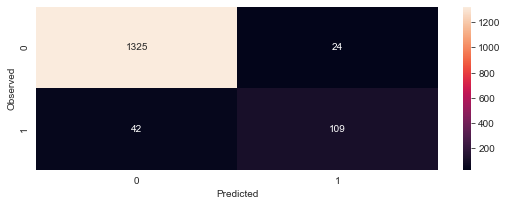

In [34]:
y_test = model_row.loc[0, 'y_test']
y_pred = model_row.loc[0, 'y_pred']
confusion_martix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_martix, annot=True, fmt='.0f', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()


### 5.	Find out coefficients of all the attributes and show the output in a data frame with column names
#### (10 marks)
- For test data show all the rows where the predicted class is not equal to the observed class. 


In [35]:
features = feature_sets[0]
model = model_row.loc[0, 'model']
coefficients = np.round(abs(model.coef_[0]),2)
data = {'feature': features, 'coefficient': coefficients}
pd.DataFrame(data).sort_values('coefficient', ascending=False)

,feature,coefficient
2,annual_income_thousands,2.95
10,education_level_2,2.03
11,education_level_3,1.98
7,has_cd,0.98
3,family_size,0.69
9,has_credit_card,0.47
8,is_online_banking,0.34
4,monthly_credit_card_avg,0.33
6,has_securities_account,0.27
0,age,0.14


In [36]:
df = pd.get_dummies(previous_campaign_results, drop_first=True)
X = df[features]
y = df['personal_loan_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=3) ## same random state as above
test_predictions = pd.DataFrame(X_test, columns=features)
test_predictions['y_test'] = y_test
test_predictions['y_pred'] = y_pred
test_predictions[test_predictions['y_test'] != test_predictions['y_pred']].head(14)

,age,work_experience_years,annual_income_thousands,family_size,monthly_credit_card_avg,mortgage_amount_thousands,has_securities_account,has_cd,is_online_banking,has_credit_card,education_level_2,education_level_3,y_test,y_pred
261,42,16.0,111,2,1.20,251,0,0,1,0,0,1,1,0
4418,59,34.0,145,4,1.80,198,0,0,1,0,0,0,1,0
4583,52,26.0,83,1,3.10,0,0,0,1,0,0,0,1,0
1679,57,31.0,114,4,5.20,0,1,1,1,0,0,0,1,0
932,51,27.0,112,3,1.80,0,1,1,1,1,1,0,0,1
1704,46,22.0,198,2,6.67,0,0,0,0,1,0,0,0,1
1793,35,9.0,113,3,0.80,0,0,0,1,0,0,1,1,0
2951,26,2.0,132,2,2.40,0,0,0,0,1,0,1,1,0
322,63,39.0,101,1,3.90,0,1,1,1,0,0,0,1,0
4993,45,21.0,218,2,6.67,0,0,0,1,0,0,0,0,1


Nothing here jumps out to me as a way to improve the model.  Remembering I never dealt with the class imbalanace but not sure how important that is since the model has good precision and recall.

### 6.	Give conclusion related to the Business understanding of your model? 
#### (5 marks)

I certainly think this model is good enough to be useful.  It has high scores across the evaluation metrics and seems to be general enought to apply to future data.  I would prefer to learn more about the specific business costs of missing through follow up analysis and/or speaking to stakeholders.  For example, if the marketing costs were very expensive, you may want to focus on targeting the potential prospects you knew you would get right over casting the widest net. In this case, you may want to pick the model with the highest precision.